# Task #2: Prediction using Unsupervised ML

## Author: SAJIDA SALAM

## Problem Statement
 We are provided with a dataset containing the features of various irises.
 
 The tasks include:<b>
 - Predict the optimum number of clusters in the dataset
 - Represent the clusters visually.

## Steps followed
The solution is divided into the following sections: 
1. Reading and understanding the data
2. Cleaning the data
3. Exploratory Data Analysis
4. Outlier Treatment
5. Data Preparation
6. K-Means Clustering

### Supress Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the libraries

In [3]:
# importing the pandas as numpy libraries libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# importing sklearn library
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to view the rows and columns without getting trimmed
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
pd.set_option('display.max_colwidth', 500)

## Reading the data

In [4]:
# storing the input file into countries dataframe
df=pd.read_csv("Iris.csv")

# printing the head
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Understanding the dataframe

In [5]:
# checking the shape of the data set
print("Shape: ",df.shape)

Shape:  (150, 6)


So our data have **150 rows** and **6 columns**.

In [6]:
# print the info regarding the various columns present in the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


int64, float64 and object are the data types of our features. We see that 'Species' is of type object, and 'Id' is integer and 4 are float. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 150 observations, the same number of rows we saw before with shape.

In [7]:
#to find the descriptive statistics.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##  Cleaning the Data



In [8]:
# Write your code for column-wise null count here
print("\nCOLUMN-WISE NULL COUNT")
df.isnull().sum()


COLUMN-WISE NULL COUNT


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see that the data set don't have any null values or missing values.

In [9]:
# to find the value counts of different species
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

There are three kinds of species of Iris: Virginica, Versicolor and Setosa.

In [10]:
# setting the 'Id' column as index
df=df.set_index('Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

### Pairplot

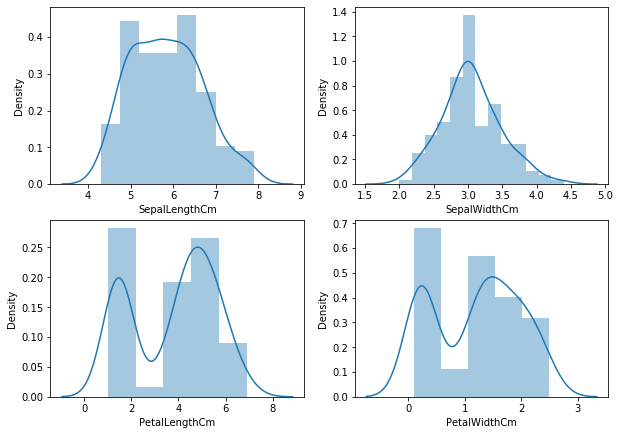

In [11]:
# pairplot for all the continuous variables
plt.figure(figsize=(10,15))
features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in enumerate(features):
    ax=plt.subplot(4,2, i[0]+1)
    sns.distplot(df[i[1]])

### The graphs shows the presence of 3 clusters.

## Outlier treatment
Clustering algorithms are highly sensitive to outliers. This is because the mean value is greatly influenced by the outliers and thus cannot represent the correct cluster center. So we should check the presence of outliers.

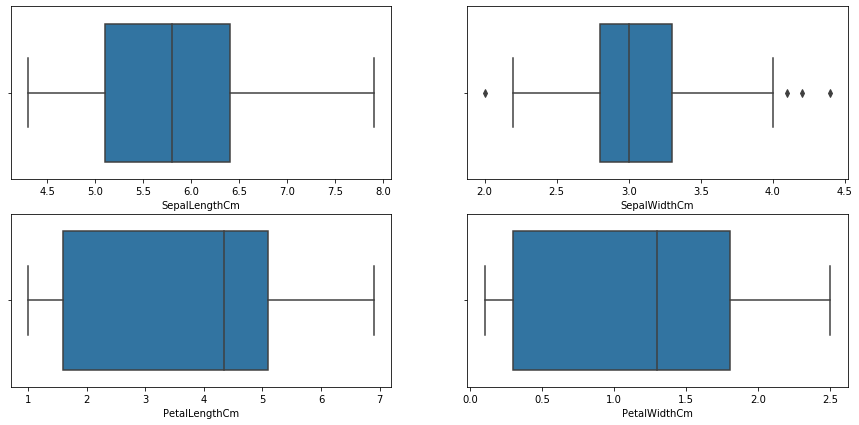

In [12]:
plt.figure(figsize = (15, 7))
feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])

Here, a few outliers are detected in SepalWidthCm. Since we have less data, we will perform soft capping. Outliers on the right side will be replaced by 99th percentile.
Similarly, outliers on the left can be floored with 0.01th percentile



In [13]:
q1 = df['SepalWidthCm'].quantile(0.01)
q4 = df['SepalWidthCm'].quantile(0.99)

#performing capping with 99th percentile; and flooring with 0.01th percentile.
df['SepalWidthCm'][df['SepalWidthCm']<=q1]=q1
df['SepalWidthCm'][df['SepalWidthCm']>=q4]=q4

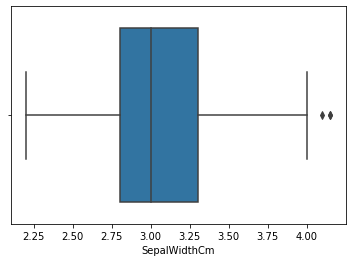

In [14]:
sns.boxplot('SepalWidthCm', data = df)
plt.show()

## Heatmap and correlation

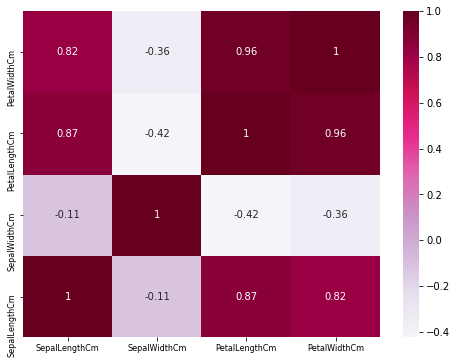

In [15]:
# plotting the heatmap
plt.figure(figsize=(8,6))
ax=sns.heatmap(df.corr(),annot=True,cmap="PuRd")
top, bottom=ax.get_ylim()
ax.set_ylim(bottom-0.5,top+0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

From the heatmap, 
- PetalLengthCm and PetalWidthCm are highly correlated linearly.
- Also SepalLengthCm and PetalWidthCm are directly proportional.

## Data preparation
We have two subtasks under the data preparation part:
- 1. Scaling the data
- 2. Calculating the Hopkins Statistics score

### Scaling the data
The variables in our data set are of different ranges. It is extremely important to rescale the variables so that they all have a comparable scale. So it is advised to use either standardization or normalization techniques.

We shall use the Standardization technique.

In [16]:
# Clustering: Unsupervised learning: removing the 'Species' column
df1=df.copy()
df.drop('Species', axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [17]:
scale = StandardScaler()
df2 = scale.fit_transform(df)

In [18]:
df2 = pd.DataFrame(df2)
df2.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


### Hopkins Statistic

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [19]:
## Hopkins Score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(df2)

0.8330080061012602

The Hopkins score is calculated a couple of times. The values come in the range of **{0.81, 0.90}**. This shows that our data has a high tendency to cluster.

## Modelling with K-Means Clustering Algorithm
###  Finding the Optimal Number of Clusters
To find the optimal number of clusters, we use;
- 1. SSD/Elbow-Curve Method
- 2. Silhouette Method

### 1. SSD / Elbow-Curve Method

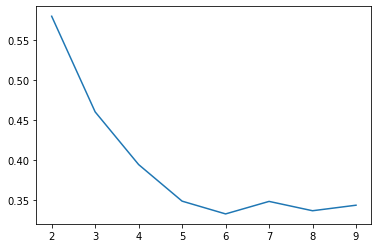

In [21]:

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(df2)
    ss.append([k, silhouette_score(df2, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()

The above Elbow Curve graph says dividing the data into **three clusters** makes it more meaningful and easily distinguishable.

### 2. Silhouette Method
- The value of the silhouette score range lies between -1 to 1.
- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [22]:
#calculating the avg.silhouette score with n_clusters ranging from 2 to 8
cluster_range=[2,3,4,5,6,7,8]
for num_cluster in cluster_range:
    kmeans = KMeans(n_clusters = num_cluster).fit(df2)
    silhouette_avg=silhouette_score(df2, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score = {1}".format(num_cluster,silhouette_avg))

For n_clusters=2, the silhouette score = 0.5799043037099341
For n_clusters=3, the silhouette score = 0.4600387728518416
For n_clusters=4, the silhouette score = 0.39400313458282277
For n_clusters=5, the silhouette score = 0.35106073791967213
For n_clusters=6, the silhouette score = 0.32460342937611486
For n_clusters=7, the silhouette score = 0.3320425151703936
For n_clusters=8, the silhouette score = 0.35539980017468137


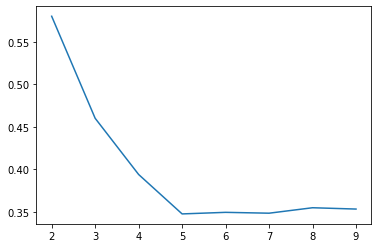

In [23]:

ss=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(df2)
    ss.append([k, silhouette_score(df2, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])
plt.show()  

The above Sihouette score graph too shows dividing the data into three clusters makes it more meaningful and easily distinguishable.

So we shall first proceed with **k = 3.** That is we ask the algorithm to divide the data into 3 clusters.

###  Perform k-Means with k = 3

In [24]:
# run model with k=3
# The cluster names will be 0,1 and 2
kmeans=KMeans(n_clusters=3, max_iter=100, random_state=500)
kmeans.fit(df2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=500, tol=0.0001, verbose=0)

In [25]:
# Now we have the cluster IDs (0,1,2) assigned to the countries in kmeans.labels_
# We create a new column 'ClusterID' for the original dataframe copy, countries_KMeans
df["ClusterID"]=kmeans.labels_
df1["ClusterID"]=kmeans.labels_
# printing the head
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ClusterID
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


In [26]:
# checking the value counts for 'ClusterID'
df["ClusterID"].value_counts()

2    56
1    50
0    44
Name: ClusterID, dtype: int64

### K-Means Clustering Algorithm with k=3 divides the data set such that,
- 44 irises fall into Cluster 0
- 50 irises fall into Cluster 1
- 56 irises fall into Cluster 2

## Visualising the K-means clusters (k=3)

### Cluster Profiling

### Plotting Cluster ID against petal length and petal width

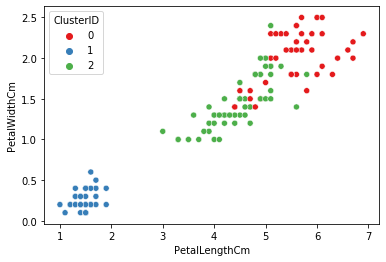

In [27]:
sns.scatterplot(x = "PetalLengthCm" , y = "PetalWidthCm", hue = 'ClusterID', data = df, palette = "Set1")
plt.show()

### Plotting Cluster ID against sepal length and sepal width

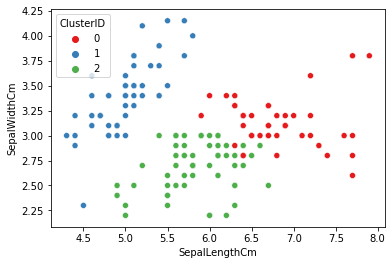

In [28]:
sns.scatterplot(x = "SepalLengthCm" , y = "SepalWidthCm", hue = 'ClusterID', data = df, palette = "Set1")
plt.show()

### Barplots of clusters v/s features

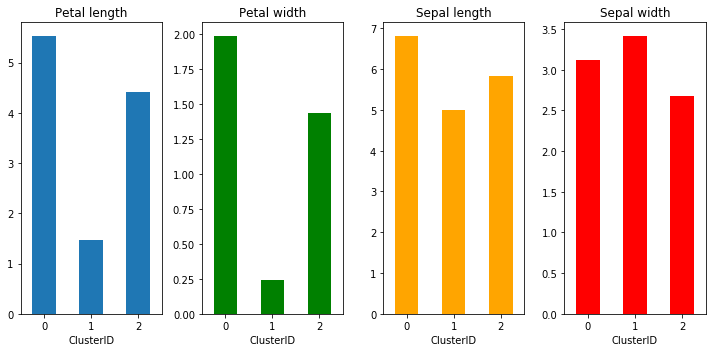

In [29]:
plt.figure(figsize=(10,5))

# plotting the clusters based on their Petal length
plt.subplot(1,4,1)
plt.title("Petal length")
df["PetalLengthCm"].groupby(df["ClusterID"]).mean().plot(kind="bar", rot=0 )

# plotting the clusters based on their Petal width
plt.subplot(1,4,2)
plt.title("Petal width")
df["PetalWidthCm"].groupby(df["ClusterID"]).mean().plot(kind="bar",color='green',rot=0)


# plotting the clusters based on their Sepal length
plt.subplot(1,4,3)
plt.title("Sepal length")
df["SepalLengthCm"].groupby(df["ClusterID"]).mean().plot(kind="bar", color='orange',rot=0)
plt.tight_layout()


# plotting the clusters based on their Sepal width
plt.subplot(1,4,4)
plt.title("Sepal width")
df["SepalWidthCm"].groupby(df["ClusterID"]).mean().plot(kind="bar", color='red',rot=0)

plt.show()

### From the above graph, we can say:
- Cluster 0 has the highest petal length, petal width and sepal width.
- Cluster 1 has the lowest petal length and petal width, but highest sepal width
- Cluster 2 has lowest sepal width and average petal length and petal width.

# Thank you !